*Outer product state*

Started running


100%|██████████| 50/50 [00:55<00:00,  1.10s/it, running=Simulating]


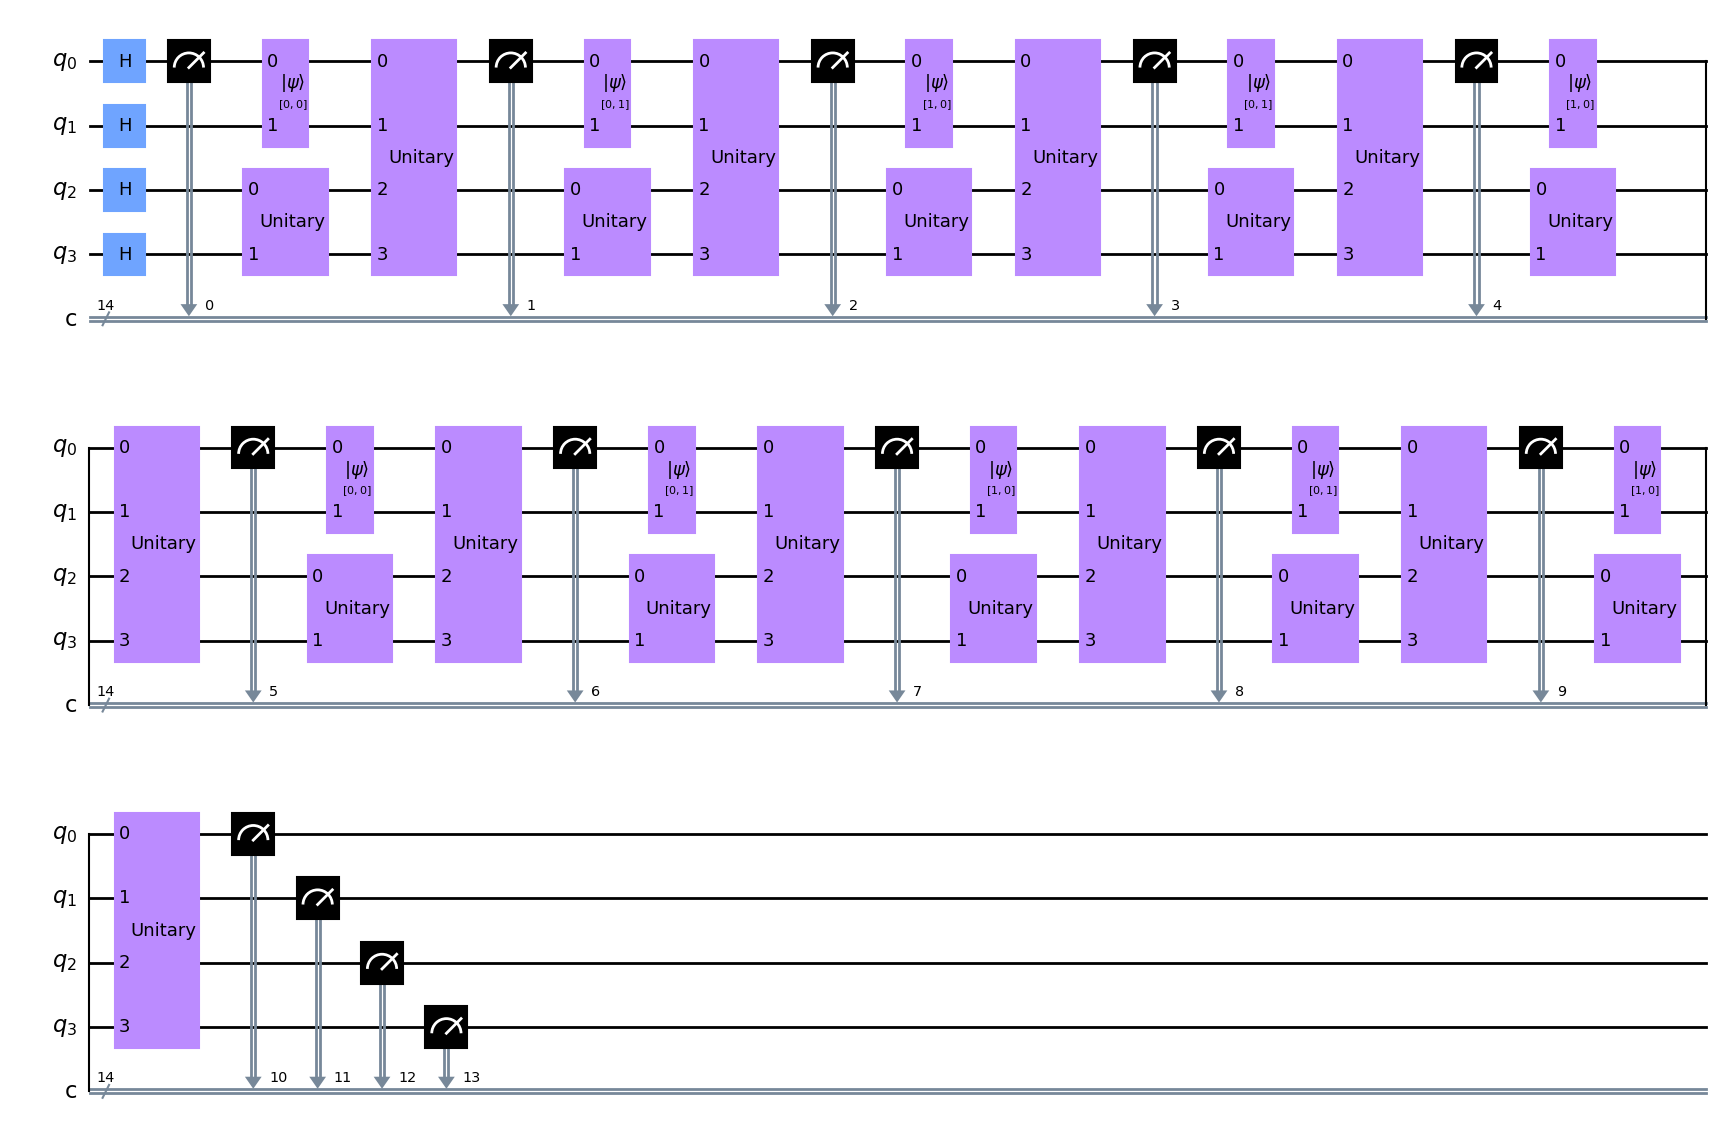

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary
from qreservoirpy import QReservoir, Layers, utilities

def analyze_fcn(res):
    vec = res[-5:]
    return np.concatenate((vec.flatten(), np.outer(vec.T, vec)[np.triu_indices(4)]))

def add_on(circ, timestep, operator, resop, encoder):
    # circ.barrier()
    circ.measure(circ.qubits[0])
    circ.initialize(encoder[timestep], [0, 1])
    circ.unitary(operator, [2, 3])
    circ.unitary(resop, circ.qubits)
    return circ

target = [0, 1, 2, 1, 2] * 10
res = QReservoir(qubits=4, layers=[
    Layers.H(),
    Layers.Timeseries(build_method=add_on, incrementally=True, M=5),
    Layers.Measurement([0, 1, 2, 3])
], operator=random_unitary(2**2),
   resop = random_unitary(2**4),
 encoder = {
    0: '00',
    1: '01',
    2: '10',
    3: '11'
}, analyze_function=analyze_fcn)


states = res.run(target, shots=10000)

res.circuit.draw('mpl')



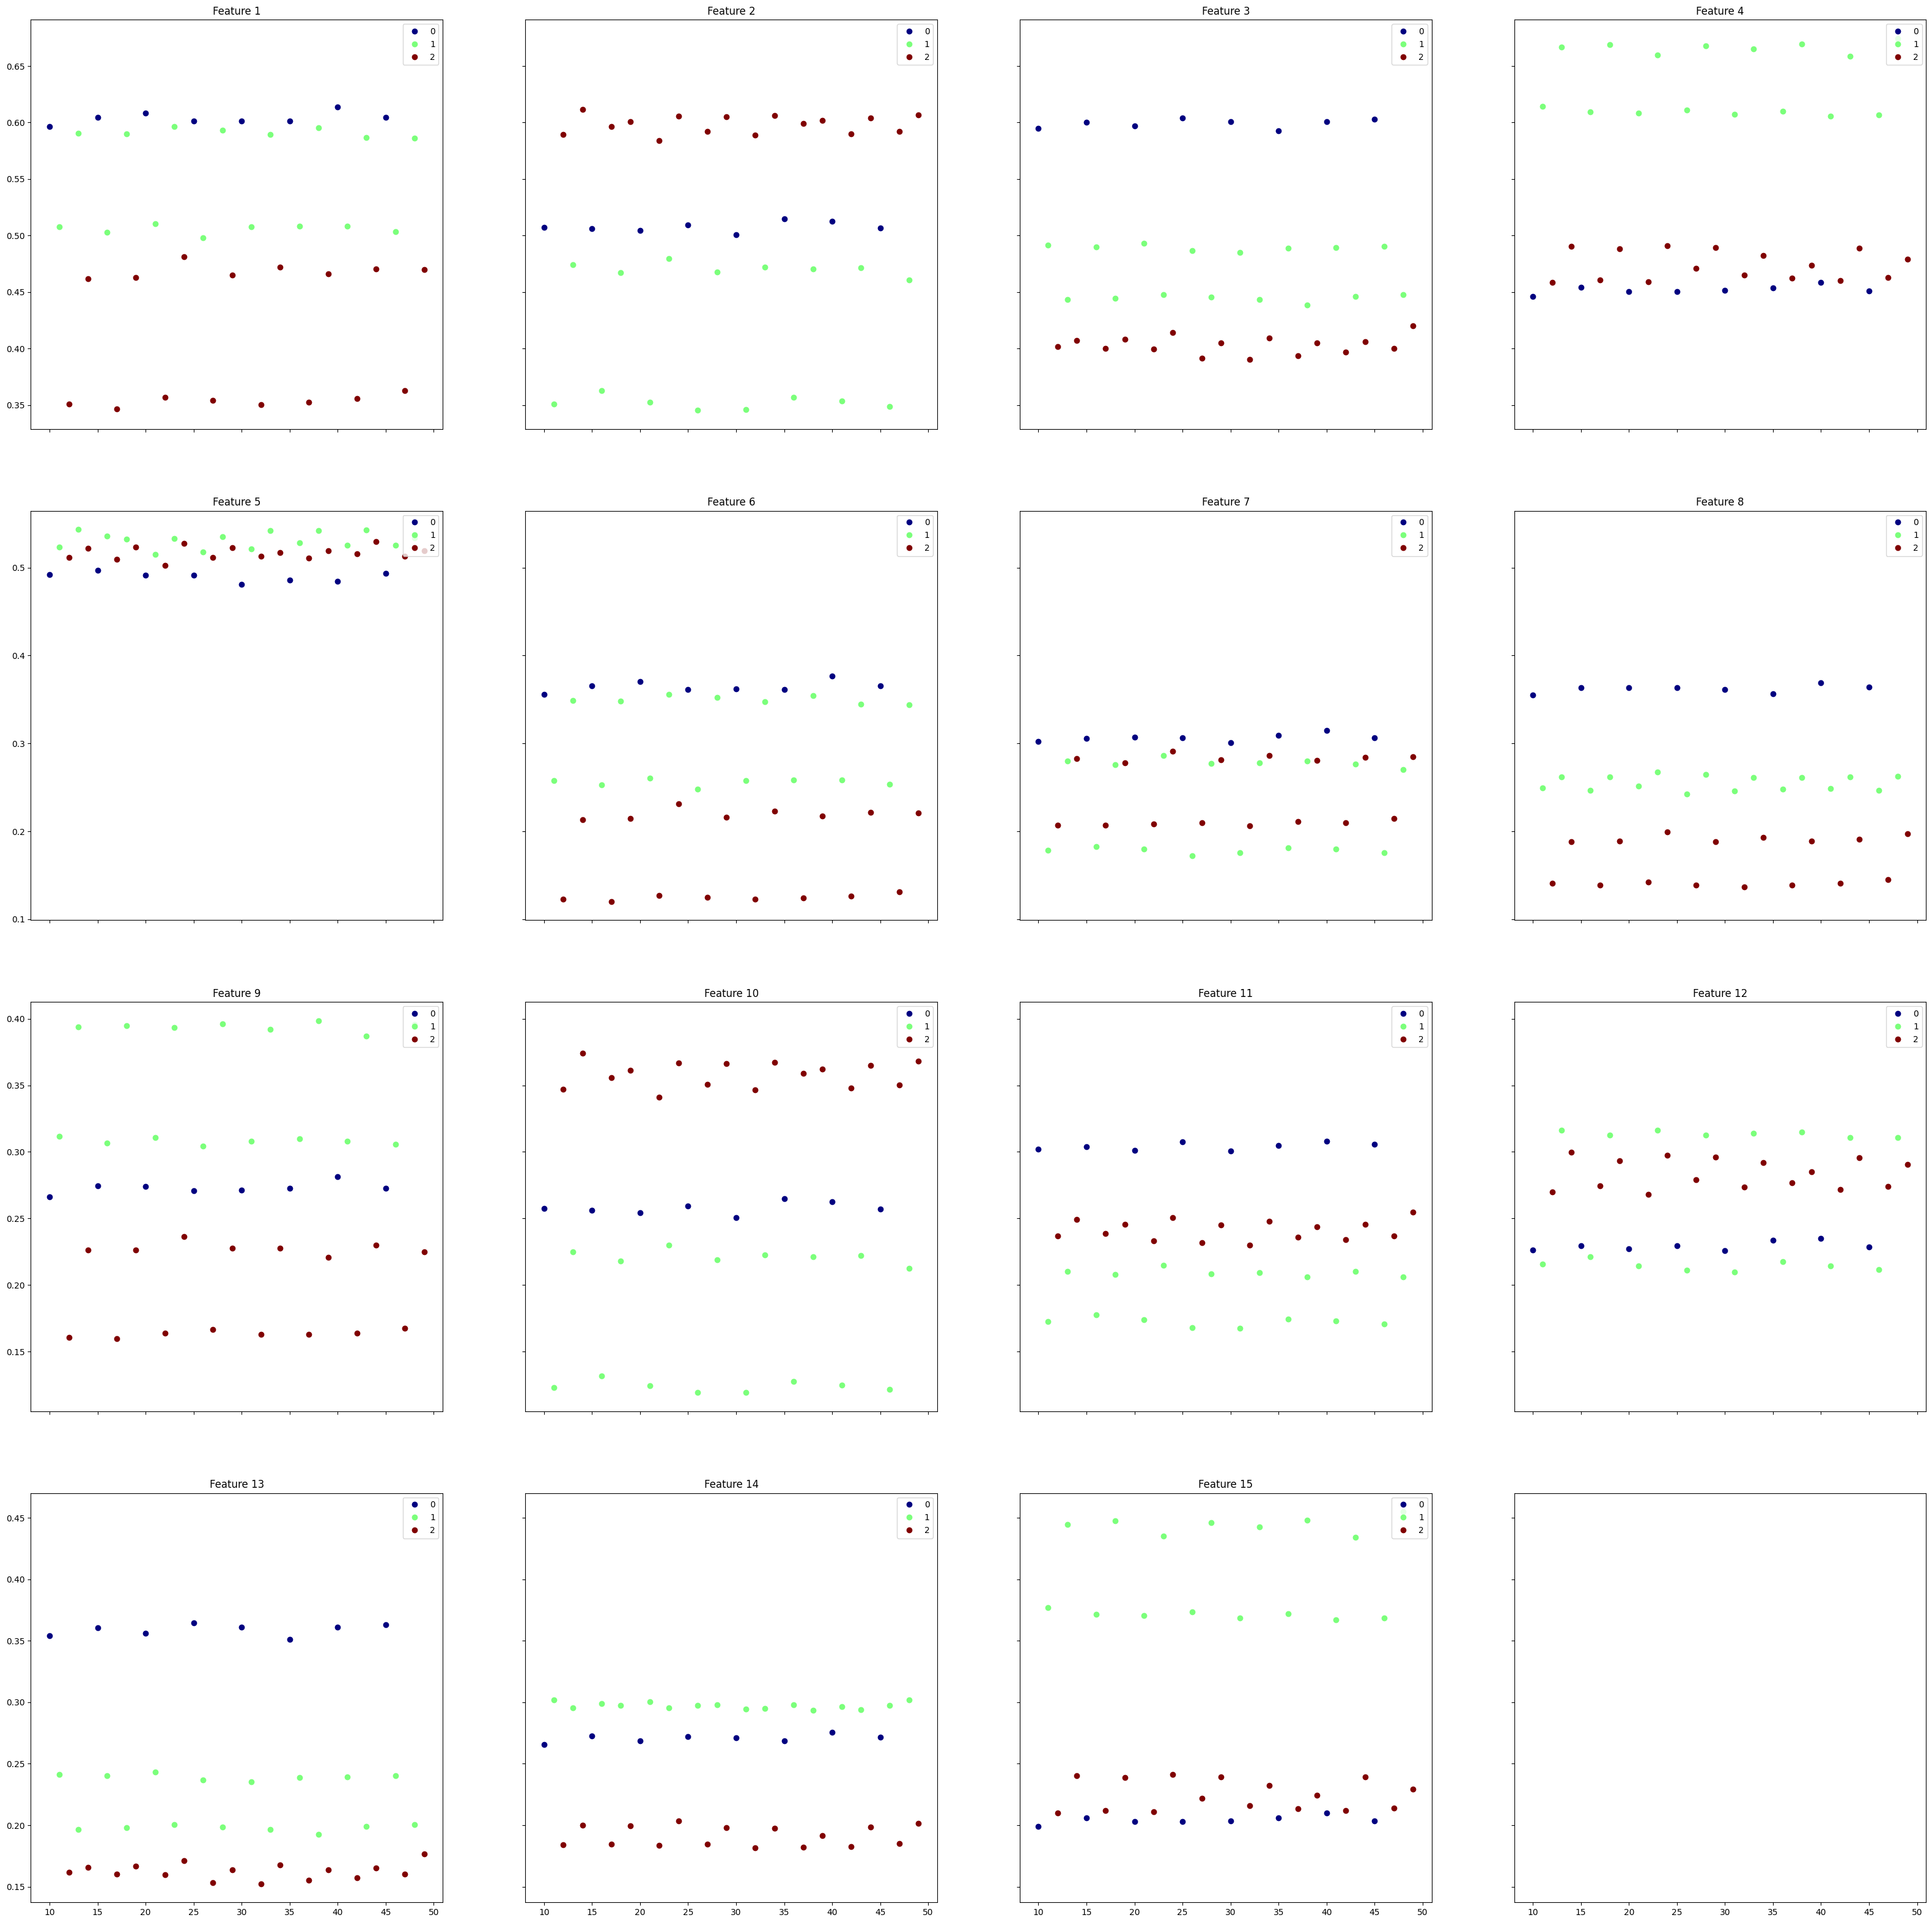

In [3]:
fig ,axes = utilities.result_plotter(states, target, warmup=0.2)